# Module 2 Summative Lab

## Introduction

For today's section, we're going to work on a single big lab to apply everything we've learned in Module 2!

## About This Lab

A quick note before getting started--this lab isn't like other labs you seen so far. This lab is meant to take ~8 hours to complete, so it's much longer and more challenging that the average labs you've seen so far. If you feel like this lab is challenging or that you might be struggling a bit, don't fret--that's by design! With everything we've learned about Web Scraping, APIs, and Databases, the best way to test our knowledge of it is to build something substantial! 

## The Project

In this lab, we're going to make use of everything we've learned about APIs, databases, and Object-Oriented Programming to **_Extract, Transform, and Load_** (or **_ETL_**, for short) some data from a SQL database into a MongoDB Database. 

You'll find a database containing information about soccer teams and the matches they've played in the file `database.sqlite`. For this project, our goal is to get the data we think is important from this SQL database, do some calculations and data transformation, and then store everything in a MongoDB database. 

Let's get into the specifics of this project.

### The Goal

Start by examining the data dictionary for the SQL database we'll be working with, which comes from this [kaggle page](https://www.kaggle.com/laudanum/footballdelphi).  Familiarize yourself with the tables it contains, and what each column means. We'll be using this database to get data on each soccer team, calculate some summary statistics, and then store each in a MongoDB database. 

Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:

* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
* The team's win percentage on days where it was raining during games in the 2011 season. 

#### Getting the Weather Data

Note that for this last calculation, you'll need to figure out if it was raining or not during the game. The database itself does not contain this information, but it does contain the date on which the game was played. For this, you'll need to use the [DarkSky API](https://darksky.net/dev) to get the historical weather data for that day. Note that each game is played in a different location, and this information is not contained in our SQL database. However, the teams in this database are largely german, so go ahead and just use the weather in Berlin, Germany as a proxy for this information. If it was raining in Berlin on the day the game was played, count that as rain game--**_you do not need to try and figure out the actual weather at each game's location, because we don't have that information!_**

#### NOTE: The DarkSky API is limited to 1000 free API calls a day, so be sure to test your model on very small samples. Otherwise, you'll hit the rate limit!

## Project Architecture

Unlike previous labs, this lab is more open-ended, and will require you to make design decisions and plan out your strategy for building a system with this many working parts. However, **_using Object-Oriented Programming is a requirement for this project--you must create at least 2 separate, well structured classes in your solution!_** Although it may seem easier to "just start coding", this is a classic beginner's mistake. Instead, think about separating out the different functionalities you'll need to reach your goal, and then build classes to handle each. For instance, at minimum, you'll need to:

* Query the SQL database
* Calculate summary statistics
* Get the weather data from the DarkSky API
* Load the data into MongoDB

We **_strongly recommend_** you consider creating separate classes for handling at least some of these of these tasks.  Be sure to plan the inputs, outputs, and methods for each class before you begin coding! 

**_NOTE:_** We have provided some empty classes below. You are welcome to delete them and use a different architecture for this project if you so choose.  You do not have to use each of them, they are just there to give you an idea of what you could sorts of classes you may want to consider using.

### Rapid Prototyping and Refactoring

It's totally okay to try to get a task working without using OOP. For instance, when experimenting with the DarkSky API for getting historical weather data, it makes sense to just write the code in the cells and rapidly iterate until you get it all working. However, once you get it working, you're not done--you should then **_Refactor_** your code into functions or classes to make your code more modular, reusable, understandable, and maintainable! 

In short--do what you need to do to get each separate piece of functionality working, and then refactor it into a class after you've figured it out!

### Some Final Advice

You haven't built anything this big or complex thus far, so you may not yet fully realize how much trial and error goes into it. If your code keeps breaking, resist the urge to get frustrated, and just keep working. Software development is an iterative process!  No one writes perfect code that works the first time for something this involved. You're going to run into _a lot_ of small errors in this project, right up until the point where it just works, and then you're done! However, you can reduce these errors by planning out your code, and thinking about how all of the pieces fit together before you begin coding. Once you have some basic understanding of how it all will work, then you'll know what you need to build, and then all that is left is to build it!

In short:

* Plan ahead--you'll thank yourself later!
* Errors and broken code aren't bad, they're normal. 
* Keep working, and stay confident--you can do this!

Good luck--we look forward to seeing your completed project!

## Import

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import requests
import functions as func  

## Connections

In [2]:
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

## Table: Matches

- Match_ID (int): unique ID per match
- Div (str): identifies the division the match was played in (D1 = Bundesliga, D2 = Bundesliga 2, E0 = English Premier League)
- Season (int): Season the match took place in (usually covering the period of August till May of the following year)
- Date (str): Date of the match
- HomeTeam (str): Name of the home team
- AwayTeam (str): Name of the away team
- FTHG (int) (Full Time Home Goals): Number of goals scored by the home team
- FTAG (int) (Full Time Away Goals): Number of goals scored by the away team
- FTR (str) (Full Time Result): 3-way result of the match (H = Home Win, D = Draw, A = Away Win)

In [3]:
# Matches from the 2011 season.

cur.execute("""SELECT * FROM matches WHERE season = 2011;""")
df_matches = pd.DataFrame(cur.fetchall())
df_matches.columns = [i[0] for i in cur.description]
display(df_matches.head())
display(df_matches.info())
display(df_matches.isna().sum())
display(df_matches.describe())

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 9 columns):
Match_ID    992 non-null int64
Div         992 non-null object
Season      992 non-null int64
Date        992 non-null object
HomeTeam    992 non-null object
AwayTeam    992 non-null object
FTHG        992 non-null int64
FTAG        992 non-null int64
FTR         992 non-null object
dtypes: int64(4), object(5)
memory usage: 69.8+ KB


None

Match_ID    0
Div         0
Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
dtype: int64

,Match_ID,Season,FTHG,FTAG
count,992.000000,992.0,992.000000,992.000000
mean,17979.213710,2011.0,1.612903,1.205645
std,21054.456586,0.0,1.345979,1.202104
min,1092.000000,2011.0,0.000000,0.000000
25%,1339.750000,2011.0,1.000000,0.000000
50%,1587.500000,2011.0,1.000000,1.000000
75%,44626.250000,2011.0,2.000000,2.000000
max,44874.000000,2011.0,8.000000,6.000000


In [4]:
cur.execute("""SELECT * FROM sqlite_sequence;""")
df_sqlite_sequence = pd.DataFrame(cur.fetchall())
df_sqlite_sequence.columns = [i[0] for i in cur.description]
display(df_sqlite_sequence.head())
display(df_sqlite_sequence.info())
display(df_sqlite_sequence.isna().sum())

,name,seq
0,Matches,46774
1,Unique_Teams,128


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
name    2 non-null object
seq     2 non-null int64
dtypes: int64(1), object(1)
memory usage: 112.0+ bytes


None

name    0
seq     0
dtype: int64

## Table: Teams

- Season (str): Football season for which the data is valid
- TeamName (str): Name of the team the data concerns
- KaderHome (str): Number of Players in the squad
- AvgAgeHome (str): Average age of players
- ForeignPlayersHome (str): Number of foreign players (non-German, non-English respectively) playing for the team
- OverallMarketValueHome (str): Overall market value of the team pre-season in EUR (based on data from transfermarkt.de)
- AvgMarketValueHome (str): Average market value (per player) of the team pre-season in EUR (based on data from transfermarkt.de)
- StadiumCapacity (str): Maximum stadium capacity of the team's home stadium

In [5]:
# Teams in 2011 season.

cur.execute("""SELECT * FROM teams WHERE season = 2011;""")
df_teams = pd.DataFrame(cur.fetchall())
df_teams.columns = [i[0] for i in cur.description]
display(df_teams.head())
display(df_teams.info())
display(df_teams.isna().sum())
display(df_teams.describe())

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2011,Bayern Munich,24,25,11,335600000,13980000,75000
1,2011,Dortmund,28,24,12,158200000,5650000,81359
2,2011,Leverkusen,29,23,9,151100000,5210000,30210
3,2011,Schalke 04,37,24,20,136730000,3700000,62271
4,2011,Werder Bremen,38,23,17,125350000,3300000,42100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
Season                    36 non-null object
TeamName                  36 non-null object
KaderHome                 36 non-null object
AvgAgeHome                36 non-null object
ForeignPlayersHome        36 non-null object
OverallMarketValueHome    36 non-null object
AvgMarketValueHome        36 non-null object
StadiumCapacity           36 non-null object
dtypes: object(8)
memory usage: 2.3+ KB


None

Season                    0
TeamName                  0
KaderHome                 0
AvgAgeHome                0
ForeignPlayersHome        0
OverallMarketValueHome    0
AvgMarketValueHome        0
StadiumCapacity           0
dtype: int64

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
count,36,36,36,36,36,36,36,36
unique,1,36,14,4,16,36,36,19
top,2011,Munich 1860,32,24,17,19500000,5650000,47728
freq,36,1,5,19,4,1,1,18


## Table: Teams_in_Matches

- Match_ID (int): Unique match ID
- Unique_Team_ID (int): Unique team ID (This table is used to easily retrieve each match a given team has played in)

In [6]:
cur.execute("""SELECT * FROM teams_in_matches;""")
df_teams_in_matches = pd.DataFrame(cur.fetchall())
df_teams_in_matches.columns = [i[0] for i in cur.description]
display(df_teams.head())
display(df_teams.info())
display(df_teams_in_matches.isna().sum())
display(df_teams_in_matches.describe())

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2011,Bayern Munich,24,25,11,335600000,13980000,75000
1,2011,Dortmund,28,24,12,158200000,5650000,81359
2,2011,Leverkusen,29,23,9,151100000,5210000,30210
3,2011,Schalke 04,37,24,20,136730000,3700000,62271
4,2011,Werder Bremen,38,23,17,125350000,3300000,42100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
Season                    36 non-null object
TeamName                  36 non-null object
KaderHome                 36 non-null object
AvgAgeHome                36 non-null object
ForeignPlayersHome        36 non-null object
OverallMarketValueHome    36 non-null object
AvgMarketValueHome        36 non-null object
StadiumCapacity           36 non-null object
dtypes: object(8)
memory usage: 2.3+ KB


None

Match_ID          0
Unique_Team_ID    0
dtype: int64

,Match_ID,Unique_Team_ID
count,49148.000000,49148.000000
mean,27325.139924,52.903028
std,16647.432504,38.825678
min,1.000000,1.000000
25%,6144.000000,17.000000
50%,34485.500000,42.000000
75%,40631.000000,90.000000
max,46774.000000,128.000000


## Table: Unique Teams

- TeamName (str): Name of a team
- Unique_Team_ID (int): Unique identifier for each team

In [7]:
cur.execute("""SELECT * FROM unique_teams;""")
df_unique_teams = pd.DataFrame(cur.fetchall())
df_unique_teams.columns = [i[0] for i in cur.description]
display(df_unique_teams.head())
display(df_unique_teams.info())
display(df_unique_teams.isna().sum())

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
TeamName          128 non-null object
Unique_Team_ID    128 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


None

TeamName          0
Unique_Team_ID    0
dtype: int64

## The Goal

- The name of the team
- The total number of goals scored by the team during the 2011 season
- The total number of wins the team earned during the 2011 season
- A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
- The team's win percentage on days where it was raining during games in the 2011 season.

## Team Name and Total Number of Goals per Team in 2011

In [8]:
# DataFrame df_goals_home is grouped by df_matches HomeTeam and total goals when they were the home team.

df_goals_home = pd.DataFrame(df_matches.groupby('HomeTeam').FTHG.sum().reset_index())
df_goals_home.head()

,HomeTeam,FTHG
0,Aachen,15
1,Arsenal,39
2,Aston Villa,20
3,Augsburg,20
4,Bayern Munich,49


In [9]:
# DataFrame df_goals_away is grouped by df_matches AwayTeam and total goals when they were the away team.

df_goals_away = pd.DataFrame(df_matches.groupby('AwayTeam').FTAG.sum().reset_index())
df_goals_away.head()

,AwayTeam,FTAG
0,Aachen,15
1,Arsenal,35
2,Aston Villa,17
3,Augsburg,16
4,Bayern Munich,28


In [10]:
# Merged or joined DataFrames df_home_team and df_away_team as a new DataFrame df.

df = df_goals_home.merge(df_goals_away, how = 'left', left_on = 'HomeTeam', right_on = 'AwayTeam')
df.head()

,HomeTeam,FTHG,AwayTeam,FTAG
0,Aachen,15,Aachen,15
1,Arsenal,39,Arsenal,35
2,Aston Villa,20,Aston Villa,17
3,Augsburg,20,Augsburg,16
4,Bayern Munich,49,Bayern Munich,28


In [11]:
# Created a new column in df titled Goals that adds the goals from FTHG and FTAG.

df['Goals'] = df.FTHG + df.FTAG
df.head()

,HomeTeam,FTHG,AwayTeam,FTAG,Goals
0,Aachen,15,Aachen,15,30
1,Arsenal,39,Arsenal,35,74
2,Aston Villa,20,Aston Villa,17,37
3,Augsburg,20,Augsburg,16,36
4,Bayern Munich,49,Bayern Munich,28,77


In [12]:
# Dropped three columns in df FTHG, AwayTeam, and FTAG.

df = df.drop(columns = ['FTHG', 'AwayTeam', 'FTAG'])
df.head()

,HomeTeam,Goals
0,Aachen,30
1,Arsenal,74
2,Aston Villa,37
3,Augsburg,36
4,Bayern Munich,77


In [13]:
# Renamed the column in df HomeTeam to Teams.

df = df.rename(columns = {'HomeTeam': 'Teams'})
df.head()

,Teams,Goals
0,Aachen,30
1,Arsenal,74
2,Aston Villa,37
3,Augsburg,36
4,Bayern Munich,77


## Number of Wins in 2011

In [14]:
# DataFrame df_wins_home filters for home wins.

df_wins_home = df_matches[df_matches['FTR'] == 'H']
df_wins_home.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H
11,1103,D1,2011,2012-03-03,Leverkusen,Bayern Munich,2,0,H
16,1108,D1,2011,2012-04-11,Dortmund,Bayern Munich,1,0,H


In [15]:
# DataFrame df_wins_away filters for away wins.

df_wins_away = df_matches[df_matches['FTR'] == 'A']
df_wins_away.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A


In [16]:
# Overwrote df_wins_home with a groupby of HomeTeam and count of each win.

df_wins_home = pd.DataFrame(df_wins_home.groupby('HomeTeam').FTR.count().reset_index())
df_wins_home.head()

,HomeTeam,FTR
0,Aachen,4
1,Arsenal,12
2,Aston Villa,4
3,Augsburg,6
4,Bayern Munich,14


In [17]:
# Overwrote df_wins_away with a groupby of AwayTeam and count of each win.

df_wins_away = pd.DataFrame(df_wins_away.groupby('AwayTeam').FTR.count().reset_index())
df_wins_away.head()

,AwayTeam,FTR
0,Aachen,2
1,Arsenal,9
2,Aston Villa,3
3,Augsburg,2
4,Bayern Munich,9


In [18]:
# Merged or joined DataFrames df_wins_home and df_wins_away as a new DataFrame df_wins.

df_wins = df_wins_home.merge(df_wins_away, how = 'outer', left_on = 'HomeTeam', right_on = 'AwayTeam')
df_wins.head()                                     

,HomeTeam,FTR_x,AwayTeam,FTR_y
0,Aachen,4,Aachen,2
1,Arsenal,12,Arsenal,9
2,Aston Villa,4,Aston Villa,3
3,Augsburg,6,Augsburg,2
4,Bayern Munich,14,Bayern Munich,9


In [19]:
# Created a new column in df_wins titled Wins that adds the wins from FTR_x and FTR_y.

df_wins['Wins'] = df_wins.FTR_x + df_wins.FTR_y
df_wins.head()

,HomeTeam,FTR_x,AwayTeam,FTR_y,Wins
0,Aachen,4,Aachen,2,6
1,Arsenal,12,Arsenal,9,21
2,Aston Villa,4,Aston Villa,3,7
3,Augsburg,6,Augsburg,2,8
4,Bayern Munich,14,Bayern Munich,9,23


In [20]:
# Dropped three columns in df_wins FTR_x, HomeTeam, and FTR_y.

df_wins = df_wins.drop(columns = ['FTR_x', 'HomeTeam', 'FTR_y'])
df_wins.head()

,AwayTeam,Wins
0,Aachen,6
1,Arsenal,21
2,Aston Villa,7
3,Augsburg,8
4,Bayern Munich,23


In [21]:
# Renamed the column in df_wins AwayTeam to Teams.

df_wins = df_wins.rename(columns = {'AwayTeam': 'Teams'})
df_wins.head()

,Teams,Wins
0,Aachen,6
1,Arsenal,21
2,Aston Villa,7
3,Augsburg,8
4,Bayern Munich,23


In [22]:
# Merged or joined DataFrames df and df_wins.

df = df.merge(df_wins, how = 'left')
df.head()

,Teams,Goals,Wins
0,Aachen,30,6
1,Arsenal,74,21
2,Aston Villa,37,7
3,Augsburg,36,8
4,Bayern Munich,77,23


## Number of Losses in 2011

In [23]:
# DataFrame df_losses_home filters for home losses.

df_losses_home = df_matches[df_matches['FTR'] == 'A']
df_losses_home.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A


In [24]:
# DataFrame df_losses_away filters for away losses.

df_losses_away = df_matches[df_matches['FTR'] == 'H']
df_losses_away.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H
11,1103,D1,2011,2012-03-03,Leverkusen,Bayern Munich,2,0,H
16,1108,D1,2011,2012-04-11,Dortmund,Bayern Munich,1,0,H


In [25]:
# Overwrote df_losses_home with a groupby of HomeTeam and count of each loss.

df_losses_home = pd.DataFrame(df_losses_home.groupby('HomeTeam').FTR.count().reset_index())
df_losses_home.head()

,HomeTeam,FTR
0,Aachen,7
1,Arsenal,3
2,Aston Villa,8
3,Augsburg,4
4,Bayern Munich,2


In [26]:
# Overwrote df_losses_away with a groupby of HomeTeam and count of each loss.

df_losses_away = pd.DataFrame(df_losses_away.groupby('AwayTeam').FTR.count().reset_index())
df_losses_away.head()

,AwayTeam,FTR
0,Aachen,8
1,Arsenal,7
2,Aston Villa,6
3,Augsburg,8
4,Bayern Munich,5


In [27]:
# Merged or joined DataFrames df_losses_home and df_losses_away as a new DataFrame df_losses.

df_losses = df_losses_home.merge(df_losses_away, how = 'outer', left_on = 'HomeTeam', right_on = 'AwayTeam')
display(df_losses.isna().sum())
display(df_losses.head())

HomeTeam    2
FTR_x       2
AwayTeam    0
FTR_y       0
dtype: int64

,HomeTeam,FTR_x,AwayTeam,FTR_y
0,Aachen,7.0,Aachen,8
1,Arsenal,3.0,Arsenal,7
2,Aston Villa,8.0,Aston Villa,6
3,Augsburg,4.0,Augsburg,8
4,Bayern Munich,2.0,Bayern Munich,5


In [28]:
# Filled FTR_x with 0 so as to be able to add both FTR_x and FTR_y successfully.

df_losses = df_losses.fillna(0)
display(df_losses.isna().sum())
display(df_losses.head())

HomeTeam    0
FTR_x       0
AwayTeam    0
FTR_y       0
dtype: int64

,HomeTeam,FTR_x,AwayTeam,FTR_y
0,Aachen,7.0,Aachen,8
1,Arsenal,3.0,Arsenal,7
2,Aston Villa,8.0,Aston Villa,6
3,Augsburg,4.0,Augsburg,8
4,Bayern Munich,2.0,Bayern Munich,5


In [29]:
# Created a new column in df_losses titled Losses that adds the losses from FTR_x and FTR_y.

df_losses['Losses'] = df_losses.FTR_x + df_losses.FTR_y
df_losses.head()

,HomeTeam,FTR_x,AwayTeam,FTR_y,Losses
0,Aachen,7.0,Aachen,8,15.0
1,Arsenal,3.0,Arsenal,7,10.0
2,Aston Villa,8.0,Aston Villa,6,14.0
3,Augsburg,4.0,Augsburg,8,12.0
4,Bayern Munich,2.0,Bayern Munich,5,7.0


In [30]:
# Dropped three columns in df_losses FTR_x, HomeTeam, and FTR_y.

df_losses = df_losses.drop(columns = ['FTR_x', 'HomeTeam', 'FTR_y'])
df_losses.head()

,AwayTeam,Losses
0,Aachen,15.0
1,Arsenal,10.0
2,Aston Villa,14.0
3,Augsburg,12.0
4,Bayern Munich,7.0


In [31]:
# Renamed the column in df_losses AwayTeam to Teams.

df_losses = df_losses.rename(columns = {'AwayTeam': 'Teams'})
df_losses.head()

,Teams,Losses
0,Aachen,15.0
1,Arsenal,10.0
2,Aston Villa,14.0
3,Augsburg,12.0
4,Bayern Munich,7.0


In [32]:
# Merged or joined DataFrames df_goals and df_loses as a new DataFrame df_goals.

df = df.merge(df_losses, how = 'left')
df.head()

,Teams,Goals,Wins,Losses
0,Aachen,30,6,15.0
1,Arsenal,74,21,10.0
2,Aston Villa,37,7,14.0
3,Augsburg,36,8,12.0
4,Bayern Munich,77,23,7.0


In [33]:
# Converted the values in df Losses to integers.

df = df.astype({'Losses': int})
df

,Teams,Goals,Wins,Losses
0,Aachen,30,6,15
1,Arsenal,74,21,10
2,Aston Villa,37,7,14
3,Augsburg,36,8,12
4,Bayern Munich,77,23,7
5,Blackburn,48,8,23
6,Bochum,41,10,17
7,Bolton,46,10,22
8,Braunschweig,37,10,9
9,Chelsea,65,18,10


## Barplot Visualization of Team Win/Loss for the 2011 Season

In [34]:
# Created a new DataFrame df_wins_losses by setting the index to Teams and dropping the Goals columns.

df_wins_losses = df.set_index('Teams').drop(columns='Goals')
df_wins_losses.head()

,Wins,Losses
Teams,,
Aachen,6,15
Arsenal,21,10
Aston Villa,7,14
Augsburg,8,12
Bayern Munich,23,7


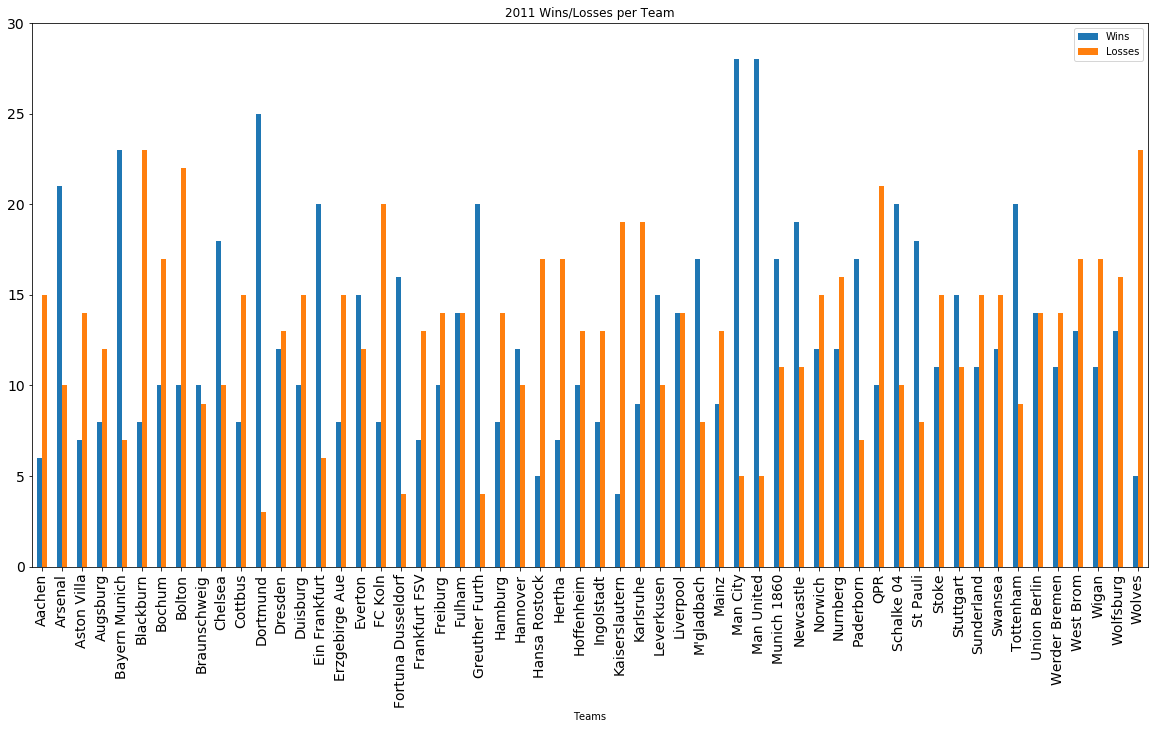

In [35]:
# Multiple bar graph shows wins and losses per team in the 2011 season.

ax = df_wins_losses.plot.bar(rot = 90, fontsize = 14, figsize = (20,10),
                             title = '2011 Wins/Losses per Team', yticks = list(range(0, 31, 5)))

## Team's Win Percentage on Rainy Days

In [36]:
# df_matches_weather initalized from df_matches.

df_matches_weather = df_matches
df_matches_weather.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [37]:
# Changed the format of the Date column to be able to pass into the function for the API.

df_matches_weather['Date'] = df_matches_weather['Date'].astype(str) + 'T12:00:00'
df_matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31T12:00:00,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11T12:00:00,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13T12:00:00,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27T12:00:00,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18T12:00:00,Freiburg,Bayern Munich,0,0,D


In [38]:
# Returns weather data as a binary (0 = not rain, 1 = rain) from Berlin given a specified date in the new column
# Weather in df_matches_weather.

df_matches_weather['Weather'] = df_matches_weather['Date'].apply(lambda x: func.find_weather(x))
df_matches_weather

TypeError: list indices must be integers or slices, not str

# Summary

In this lab, we dug deep and used everything we've learned so far about python programming, databases, HTTP requests and API calls to ETL data from a SQL database into a MongoDB instance!